Beyond Hello World, A Computer Vision Example
In the previous exercise you saw how to create a neural network that figured out the problem you were trying to solve. This gave an explicit example of learned behavior. Of course, in that instance, it was a bit of overkill because it would have been easier to write the function Y=2x-1 directly, instead of bothering with using Machine Learning to learn the relationship between X and Y for a fixed set of values, and extending that for all values.

But what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where we can recognize different items of clothing, trained from a dataset containing 10 different types.

Start Coding
Let's start with our import of TensorFlow

In [2]:
import tensorflow as tf
print(tf.__version__)


2.3.0


The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [3]:
mnist=tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.

In [7]:
(training_images,training_labels),(testing_images,testing_labels)=mnist.load_data()

What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

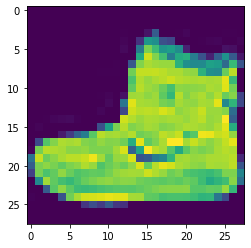

In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=200) #prints more values in a line, but only when written before plt.imshow

plt.imshow(training_images[0])
print(training_images[0])
print(training_labels[0])



[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237 255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234 238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0 194 239 226 237 235 23

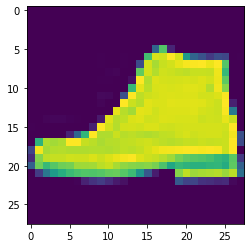

In [11]:
plt.imshow(training_images[42])
print(training_images[42])
print(training_labels[42])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [12]:
training_images=training_images/255.0
testing_images=testing_images/255.0

Now you might be wondering why there are 2 sets...training and testing -- remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data...that the model hasn't yet seen...to see how good it would be at classifying values. After all, when you're done, you're going to want to try it out with data that it hadn't previously seen!

In [15]:
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128,activation=tf.nn.relu),
                        tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

Sequential: defines the SEQUENCE of layers in the nn

Flattern: Flatterns a square image into a one dimensional array, thus leading into faster processing

Dense: It adds neurons to the network

Note: Every NN needs an activation fuction to tell a NN what to do

RELU: What it does is, if X>0; return X; else return 0, so it only passes with 0 or 1 onto the next layer

Softmax: Chooses the highest value eg: if the list contains values such as [0.3,0.5,0.9,0.01], it will convert that into [0,0,1,0] for that the program knows where the biggest value is 




The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling *model.fit * asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like.

In [18]:
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

model.fit(training_images,training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4971 - accuracy: 0.8269
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3747 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3392 - accuracy: 0.8754
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3146 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2971 - accuracy: 0.8908


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.8908. This tells you that your neural network is about 89% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 89% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [22]:
model.evaluate(testing_images,testing_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3654 - accuracy: 0.8685


[0.3654124140739441, 0.8684999942779541]

For me, that returned a accuracy of about .8838, which means it was about 88% accurate. As expected it probably would not do as well with unseen data as it did with data it was trained on! As you go through this course, you'll look at ways to improve this.

To explore further, try the below exercises:

Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?

In [24]:
classifications = model.predict(testing_images)

print(classifications[0])

[1.9108331e-05 3.1056669e-07 3.8446944e-07 1.6521174e-06 5.4206367e-07 1.6131431e-02 1.0244675e-05 2.7792148e-02 1.6774729e-05 9.5602739e-01]


Hint: try running print(test_labels[0]) -- and you'll get a 9. Does that help you understand why this list looks the way it does?

In [26]:
print(testing_labels[0])

9


What does this list represent?
It's 10 random meaningless values
It's the first 10 classifications that the computer made
It's the probability that this item is each of the 10 classes

Answer:
The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value (https://github.com/zalandoresearch/fashion-mnist#labels), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities.

For the 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that it's almost certainly a 7.

How do you know that this list tells you that the item is an ankle boot?
There's not enough information to answer that question
The 10th element on the list is the biggest, and the ankle boot is labelled 9
The ankle boot is label 9, and there are 0->9 elements in the list


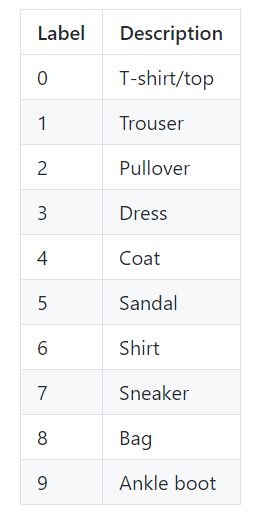 (https://github.com/zalandoresearch/fashion-mnist#labels)

Answer
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot



Exercise 2:
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case?

In [28]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [29]:
mnist=tf.keras.datasets.fashion_mnist

In [30]:
(training_images,training_labels),(test_images,test_labels)=mnist.load_data()

In [31]:
training_images=training_images/255.0
test_images=test_images/255.0

In [34]:
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                         tf.keras.layers.Dense(504,activation=tf.nn.relu),
                                        tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [38]:
model.fit(training_images,training_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4723
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3602
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3222
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2991
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2819


In [39]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3327


0.33269208669662476

In [40]:
classification=model.predict(test_images)

print(classification[0])
print(test_labels[0])

[1.0111919e-07 6.4424119e-09 3.3249272e-09 1.6116193e-08 1.7638401e-08 1.6705900e-04 1.0189168e-07 2.1343429e-02 8.9905541e-08 9.7848916e-01]
9


Question. Increase to 1024 Neurons -- What's the impact?
Training takes longer, but is more accurate
Training takes longer, but no impact on accuracy
Training takes the same time, but is more accurate


Answer
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

Exercise 3:
What would happen if you remove the Flatten() layer. Why do you think that's the case?

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

In [49]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras

2.3.0


In [51]:
# import tensorflow as tf
# from tf import keras


mnist=tf.keras.datasets.mnist

(training_images,training_labels),(test_images,test_labels)=mnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0


model=tf.keras.models.Sequential([#tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(350,activation=tf.nn.relu),
                                 tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

model.fit(training_images,training_labels,epochs=5)

model.evaluate(test_images,test_labels)

classifications=model.predict(test_images)

print(classifications[0])

print(test_labels[0])


#Without Flatten we will get a i ValueError: Shape mismatch: The shape of labels (received (32, 1)) should equal the shape of logits except for the last dimension (received (32, 28, 10)).

Epoch 1/5


ValueError: in user code:

    c:\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    c:\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\python\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\python\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\python\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    c:\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:749 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    c:\python\python37\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    c:\python\python37\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    c:\python\python37\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    c:\python\python37\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    c:\python\python37\lib\site-packages\tensorflow\python\keras\losses.py:1567 sparse_categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis)
    c:\python\python37\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    c:\python\python37\lib\site-packages\tensorflow\python\keras\backend.py:4783 sparse_categorical_crossentropy
        labels=target, logits=output)
    c:\python\python37\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    c:\python\python37\lib\site-packages\tensorflow\python\ops\nn_ops.py:4176 sparse_softmax_cross_entropy_with_logits_v2
        labels=labels, logits=logits, name=name)
    c:\python\python37\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    c:\python\python37\lib\site-packages\tensorflow\python\ops\nn_ops.py:4091 sparse_softmax_cross_entropy_with_logits
        logits.get_shape()))

    ValueError: Shape mismatch: The shape of labels (received (32, 1)) should equal the shape of logits except for the last dimension (received (32, 28, 10)).


Exercise 5:
Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.

In [62]:
import tensorflow as tf
from tensorflow import keras


mnist=tf.keras.datasets.mnist

(training_images,trainning_labels),(test_images,test_labels)=mnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0

model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(150,activation=tf.nn.relu),
                                 tf.keras.layers.Dense(50,activation=tf.nn.relu),
                                 tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

model.fit(training_images,training_labels,epochs=5)

model.evaluate(test_images,test_labels)



classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2403
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0999
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0683
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0510
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0718
[1.32996245e-08 6.46765102e-06 2.06235131e-06 2.06621680e-05 3.77912229e-10 7.32440355e-07 2.21727302e-12 9.99969959e-01 1.79115247e-08 8.84044056e-08]
7


Exercise 6:
Consider the impact of training for more or less epochs. Why do you think that would be the case?

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5 Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [66]:
import tensorflow as tf
from tensorflow import keras

mnist=tf.keras.datasets.mnist

(training_images,training_labels),(test_images,test_labels)=mnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0

model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(155,activation='relu'),
                                 tf.keras.layers.Dense(10,activation='softmax')])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

model.fit(training_images,training_labels,epochs=30)

model.evaluate(test_images,test_labels)

classifications=model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2464
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1056
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0716
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0524
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0400
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0309
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0251
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0184
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0162
Epoch 10/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0144
Epoch 11/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0110
Epoch 12/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0093
E

Exercise 7:
Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results?

In [67]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# training_images=training_images/255.0
# test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.3.0
Epoch 1/5
1875/1875 [==============================] - 8s 5ms/step - loss: 2.6343
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3817
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3143
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2872
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3516
[1.2451922e-26 1.8018379e-13 3.7626399e-19 4.0298175e-14 4.0826703e-27 1.0320730e-17 0.0000000e+00 1.0000000e+00 7.9840878e-21 9.2887502e-18]
7


Exercise 8:
Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [71]:
import tensorflow as tf
from tensorflow import keras

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.4):
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

mnist=tf.keras.datasets.mnist

(training_images,training_labels),(test_images,test_labels)=mnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0

model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(155,activation='relu'),
                                 tf.keras.layers.Dense(10,activation='softmax')])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

model.fit(training_images,training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1862/1875 [============================>.] - ETA: 0s - loss: 0.2559
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2548


Using callbacks to stop trainig when the model reaches the desired output

In [76]:
import tensorflow as tf
from tensorflow import keras


class myCallback(tf.keras.callbacks.Callback):
    def on_each_epoch_end(self,epoch,logs={}):
        if (logs.get('accuracy')>0.6):
            print('\n Reached the desired output of 60% thus cancelling the training')
            self.model.stop_training=True
            
            
callbacks=myCallback()

mnist=tf.keras.datasets.mnist

(training_images,training_lists),(test_images,test_lists)=mnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0

model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(150,activation='relu'),
                                 tf.keras.layers.Dense(10,activation='softmax')])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

model.fit(training_images,training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2479
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1076
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0720
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0534
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0402
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0300
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0254
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0210
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0162
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0141


My above experimental mthod of callback didn't work he is Another way of writing the same code with train_test split

In [83]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4749 - accuracy: 0.8307
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3596 - accuracy: 0.8696
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3222 - accuracy: 0.8812
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3006 - accuracy: 0.8892
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2817 - accuracy: 0.8955
Epoch 6/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.2657 - accuracy: 0.9009
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2657 - accuracy: 0.9010


In [78]:
def train_mnist():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    # YOUR CODE SHOULD START HERE
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('acc')>0.99):
                print("/nReached 99% accuracy so cancelling training!")
                self.model.stop_training = True
    # YOUR CODE SHOULD END HERE

    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data()
    # YOUR CODE SHOULD START HERE
    x_train, x_test = x_train / 255.0, x_test / 255.0
    

    callbacks = myCallback()
    # YOUR CODE SHOULD END HERE
    model = tf.keras.models.Sequential([
        # YOUR CODE SHOULD START HERE
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        # YOUR CODE SHOULD END HERE
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # model fitting
    history = model.fit(# YOUR CODE SHOULD START HERE
        x_train,
        y_train,
        epochs=10,
        callbacks=[callbacks]
              # YOUR CODE SHOULD END HERE
    )
    # model fitting
    return history.epoch, history.history['acc'][-1]

In [84]:
def train_mnist():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    # YOUR CODE SHOULD START HERE
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy')>0.99):
                print("/nReached 99% accuracy so cancelling training!")
                self.model.stop_training = True
    # YOUR CODE SHOULD END HERE

    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data()
    # YOUR CODE SHOULD START HERE
    x_train, x_test = x_train / 255.0, x_test / 255.0
    

    callbacks = myCallback()
    # YOUR CODE SHOULD END HERE
    model = tf.keras.models.Sequential([
        # YOUR CODE SHOULD START HERE
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        # YOUR CODE SHOULD END HERE
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # model fitting
    history = model.fit(x_train,y_train,epochs=10,callbacks=[callbacks])
    # model fitting
    return history.epoch, history.history['accuracy'][-1]

In [85]:
train_mnist() #Note:use tf version is more than 2, then try log.get('accuracy')

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2028 - accuracy: 0.9399
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0824 - accuracy: 0.9746
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0534 - accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0372 - accuracy: 0.9878
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0276 - accuracy: 0.9912


([0, 1, 2, 3, 4], 0.991183340549469)